# Bank Marketing Dataset - Data Dictionary

## Dataset Information

**Title:** Bank Marketing (with social/economic context)

**Source:** UCI Machine Learning Repository
**Created by:** Sérgio Moro (ISCTE-IUL), Paulo Cortez (Univ. Minho) and Paulo Rita (ISCTE-IUL) @ 2014

### Citation
If you use this dataset, please include the following citation:

> [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, In press, http://dx.doi.org/10.1016/j.dss.2014.03.001

## Dataset Overview

- **Number of Instances:** 41,188 (bank-additional-full.csv)
- **Number of Features:** 20 input variables + 1 output variable
- **Time Period:** May 2008 to November 2010
- **Target Variable:** Binary classification - predict if the client will subscribe a bank term deposit

## Feature Descriptions

### Bank Client Data

| Variable | Type | Description | Values |
|----------|------|-------------|---------|
| `age` | Numeric | Age of the client | Integer values |
| `job` | Categorical | Type of job | "admin.", "blue-collar", "entrepreneur", "housemaid", "management", "retired", "self-employed", "services", "student", "technician", "unemployed", "unknown" |
| `marital` | Categorical | Marital status | "divorced", "married", "single", "unknown" <br/>*Note: "divorced" includes divorced or widowed* |
| `education` | Categorical | Education level | "basic.4y", "basic.6y", "basic.9y", "high.school", "illiterate", "professional.course", "university.degree", "unknown" |
| `default` | Categorical | Has credit in default? | "no", "yes", "unknown" |
| `housing` | Categorical | Has housing loan? | "no", "yes", "unknown" |
| `loan` | Categorical | Has personal loan? | "no", "yes", "unknown" |

### Last Contact Information (Current Campaign)

| Variable | Type | Description | Values |
|----------|------|-------------|---------|
| `contact` | Categorical | Contact communication type | "cellular", "telephone" |
| `month` | Categorical | Last contact month of year | "jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec" |
| `day_of_week` | Categorical | Last contact day of the week | "mon", "tue", "wed", "thu", "fri" |
| `duration` | Numeric | Last contact duration (seconds) | Integer values <br/>**⚠️ Important: See note below** |

### Campaign Information

| Variable | Type | Description | Values |
|----------|------|-------------|---------|
| `campaign` | Numeric | Number of contacts performed during this campaign for this client | Integer (includes last contact) |
| `pdays` | Numeric | Days since client was last contacted from a previous campaign | Integer (999 = not previously contacted) |
| `previous` | Numeric | Number of contacts performed before this campaign for this client | Integer |
| `poutcome` | Categorical | Outcome of the previous marketing campaign | "failure", "nonexistent", "success" |

### Social and Economic Context Attributes

| Variable | Type | Description | Indicator Type |
|----------|------|-------------|----------------|
| `emp.var.rate` | Numeric | Employment variation rate | Quarterly indicator |
| `cons.price.idx` | Numeric | Consumer price index | Monthly indicator |
| `cons.conf.idx` | Numeric | Consumer confidence index | Monthly indicator |
| `euribor3m` | Numeric | Euribor 3 month rate | Daily indicator |
| `nr.employed` | Numeric | Number of employees | Quarterly indicator |

### Target Variable

| Variable | Type | Description | Values |
|----------|------|-------------|---------|
| `y` | Binary | Has the client subscribed a term deposit? | "yes", "no" |

## Important Notes

### Duration Variable Warning
⚠️ **Critical Note about `duration` variable:**
- This attribute highly affects the output target (if duration=0 then y="no")
- Duration is not known before a call is performed
- After the call ends, the outcome (y) is obviously known
- **Recommendation:** This variable should only be included for benchmark purposes and should be **discarded** if the intention is to have a realistic predictive model

### Missing Values
- Several categorical attributes contain missing values
- All missing values are coded with the label **"unknown"**
- These can be treated as:
  - A possible class label
  - Handled using deletion techniques
  - Handled using imputation techniques

### Dataset Versions
The dataset comes in two versions:
1. **bank-additional-full.csv**: Full dataset with 41,188 examples (ordered by date)
2. **bank-additional.csv**: 10% sample with 4,119 examples (randomly selected)
   - Provided for testing computationally demanding algorithms (e.g., SVM)

## Data Loading in Python

```python
import pandas as pd

# Load the full dataset
df = pd.read_csv('bank-additional-full.csv', sep=';')

# Basic info
print(f"Dataset shape: {df.shape}")
print(f"Target distribution:\n{df['y'].value_counts()}")
```

## Additional Resources

- [Original Paper](http://dx.doi.org/10.1016/j.dss.2014.03.001)
- [UCI Repository](http://archive.ics.uci.edu/ml/datasets/Bank+Marketing)
- [Banco de Portugal Statistics](https://www.bportugal.pt/estatisticasweb)

In [1]:
import pandas as pd
from tools import *
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set pandas display options for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 50)

In [2]:
df = load_dataset('data/bank-additional-full.csv')
get_basic_info(df)
data_summary=check_data_quality(df)







======================================================================

📋 STEP 1: LOAD  DATASET FROM CSV

======================================================================


======================================================================

📋 STEP 2: BASIC DATASET INFORMATION

======================================================================

📐 Dataset Dimensions:

   • Rows (samples): 41,188

   • Columns (features): 21

   • Memory usage: 30.26 MB


🏷️  Data Type Distribution:

   • object: 11 columns

   • int64: 5 columns

   • float64: 5 columns


📊 Column Classification:

| Type | Count | Columns |
|:------|:-------|:---------|
| **Numerical** | **10** | age, duration, campaign, pdays, previous, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed |
| **Categorical** | **11** | job, marital, education, default, housing, loan, contact, month, day_of_week, poutcome, y |


======================================================================

🔍 STEP 3: DATA QUALITY ASSESSMENT

======================================================================

1️⃣ Missing Values Analysis:

   ✅ No missing values found!


2️⃣ Duplicate Rows Analysis:

   ⚠️  Found 12 duplicate rows (0.0%)


3️⃣ Empty String Analysis:

   ✅ No empty strings found in categorical columns!


4️⃣ Data Consistency Checks:

   ✅ No obvious consistency issues detected!


📊 Data Quality Summary:

   • Dataset completeness: 100.0%

   • Unique rows: 41176/41188

# Data Dictionary 📊

| Variable Name | Role | Type | Description | Units |
|---------------|------|------|-------------|-------|
| age | Feature | Numeric 🔢 | Client's age. | (not specified) |
| job | Feature | Categorical 🏷️ | Type of job: "admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar", "self-employed", "retired", "technician", "services". | (not specified) |
| marital | Feature | Categorical 🏷️ | Marital status: "married", "divorced", "single". Note: "divorced" includes widowed. 💔 | (not specified) |
| education | Feature | Categorical 🏷️ | Education level: "unknown", "secondary", "primary", "tertiary". 🎓 | (not specified) |
| default | Feature | Binary ✅❌ | Has credit in default?: "yes" or "no". ⚠️ | (not specified) |
| balance | Feature | Numeric 🔢 | Average yearly balance. 💰 | euros 💶 |
| housing | Feature | Binary ✅❌ | Has a housing loan?: "yes" or "no". 🏠 | (not specified) |
| loan | Feature | Binary ✅❌ | Has a personal loan?: "yes" or "no". 💳 | (not specified) |
| contact | Feature | Categorical 🏷️ | Contact communication type: "unknown", "telephone", "cellular". 📞📱 | (not specified) |
| day | Feature | Numeric 🔢 | Last contact day of the month. 📅 | (not specified) |
| month | Feature | Categorical 🏷️ | Last contact month of the year: "jan", "feb", "mar", ..., "nov", "dec". 🗓️ | (not specified) |
| duration | Feature | Numeric 🔢 | Last contact duration. ⏱️ | seconds ⏲️ |
| campaign | Feature | Numeric 🔢 | Number of contacts performed during this campaign for this client. 📢 | (not specified) |
| pdays | Feature | Numeric 🔢 | Days since client was last contacted from a previous campaign (-1 means not previously contacted). 📆 | (not specified) |
| previous | Feature | Numeric 🔢 | Number of contacts performed before this campaign for this client. 🔄 | (not specified) |
| poutcome | Feature | Categorical 🏷️ | Outcome of the previous marketing campaign: "unknown", "other", "failure", "success". 📈📉 | (not specified) |
| y | Target | Binary ✅❌ | Has the client subscribed to a term deposit?: "yes" or "no". 🎯 | (not specified) |

### Legend 📝
- 🔢 **Numeric**: Continuous or discrete numerical values
- 🏷️ **Categorical**: Discrete categories or labels
- ✅❌ **Binary**: Yes/No or True/False values
- 🎯 **Target**: The variable we want to predict
- ⚠️ **Important**: Credit default status - critical risk indicator
- 💰 **Financial**: Money-related variable
- 📞📱 **Communication**: Contact method indicators
- ⏱️ **Time**: Duration or time-related measurements

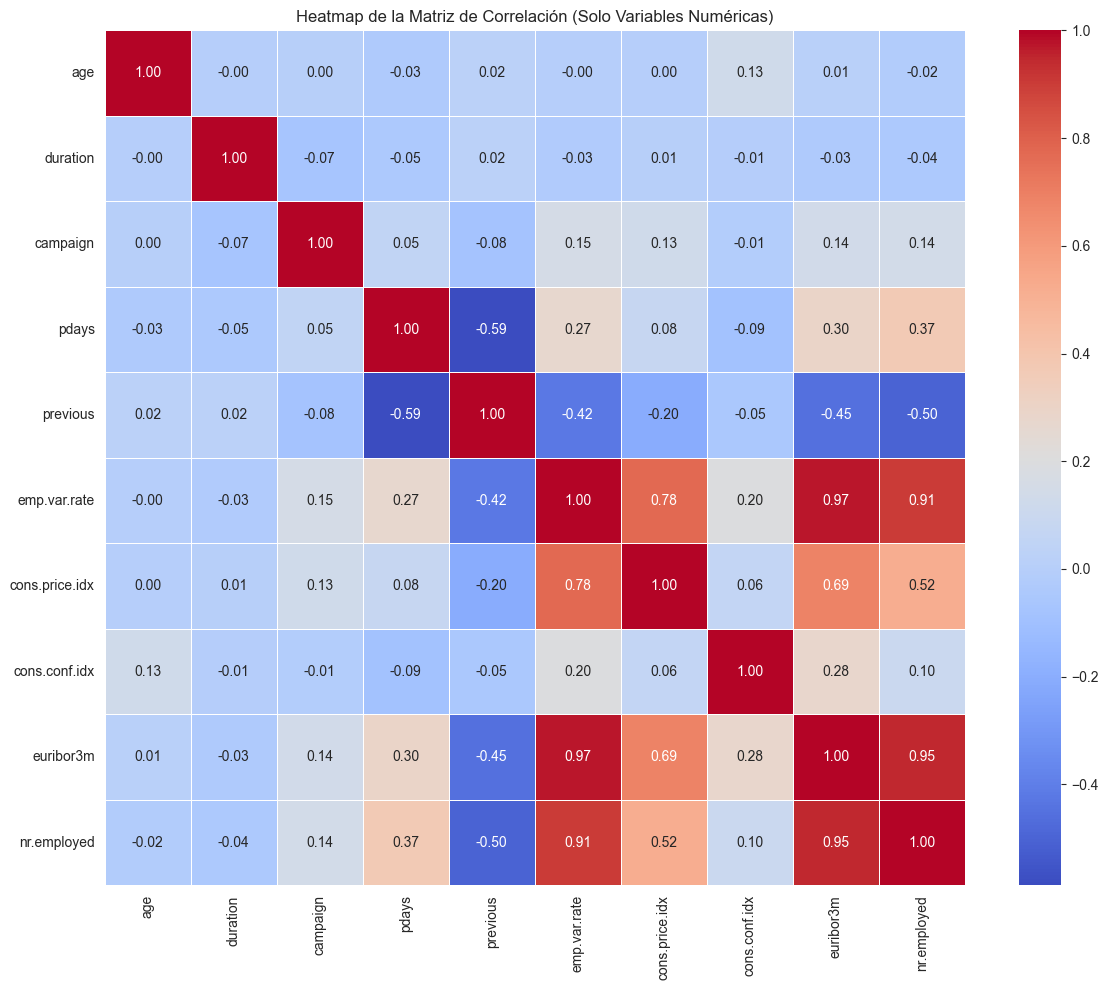

In [4]:
#sns.pairplot(df, height=2.5)
numerical_columns = df.select_dtypes(include=[np.number]).columns
df_numerical = df[numerical_columns]

# Create correlation heatmap only for numerical data
plt.figure(figsize=(12, 10))
sns.heatmap(df_numerical.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap de la Matriz de Correlación (Solo Variables Numéricas)')
plt.tight_layout()
plt.show()



In [5]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64